In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [11]:
data = pd.read_csv("F:/poralekha/programming/python/dataset/titanic.csv")

In [12]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Here we can see there are 177 missing values in "Age" group and 687 missing values in "Cabin" group and only 2 missing values in "Embarked" group . We can visualize the missing value by heatmap. let's see

<Axes: >

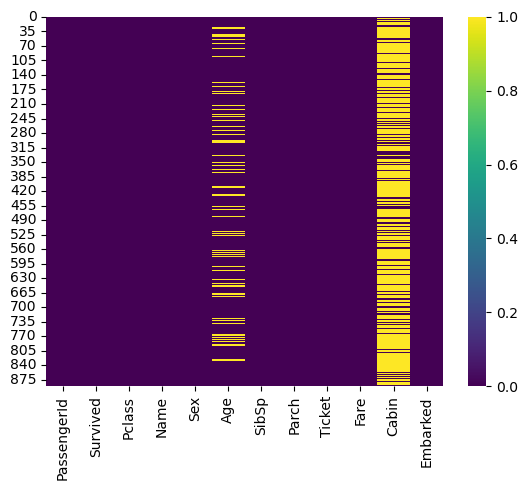

In [15]:
sns.heatmap(data.isnull(),cmap = "viridis")

##### Here yellow shade indicate the existing value and the gap between yellow shade indicates the missing value


# Data Wrangling

In [17]:
agemean = data['Age'].mean()

In [18]:
## fill the null value of Age group with its mean value

data["Age"].fillna(agemean , inplace = True)

In [19]:
mode_embarked = data["Embarked"].mode()

In [20]:
## Replacing the null value in "Embarked " group with the mode which is "S"

data["Embarked"].fillna(mode_embarked[0], inplace  = True)

##### Here we replace the missing values of "Embarked" group with mode not mean. Cause this is catergorical group . 

In [21]:
## Removing the unneccesary group

data.drop(['Name','PassengerId','Ticket','Cabin'], inplace = True , axis = 1)

In [22]:
## Now check the null values
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##### No missing values ! .All data is clean now . Hurrah!

In [23]:
data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
## Now we have to create dummy variable .
data.replace({'Sex': {'male':0 ,'female':1 }, 'Embarked':{'S': 0 , 'C':1 , 'Q': 2}} , inplace = True)

In [26]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
5,0,3,0,29.699118,0,0,8.4583,2
6,0,1,0,54.000000,0,0,51.8625,0
7,0,3,0,2.000000,3,1,21.0750,0
8,1,3,1,27.000000,0,2,11.1333,0
9,1,2,1,14.000000,1,0,30.0708,1


In [27]:
x  = data.drop(["Survived"] , axis = 1)
x
y = data["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = .1)

In [30]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit ( xtrain , ytrain)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
lgr.score(xtest , ytest)

0.8444444444444444

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt.score(xtest , ytest)

0.7666666666666667

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
rf.score(xtest , ytest)

0.8111111111111111

## find accuracy by splitting with cross validation

In [76]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
sk_fold = StratifiedKFold(n_splits =5 )


In [77]:
##  Creating a function for find the accuracy score 
def accuracy_check(model,x,y):
    scores = cross_val_score(model, x , y, cv =sk_fold)
    print("cross validation score is :",scores)
    print("Average score value is :",scores.mean())
    

In [78]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lgr = LogisticRegression()


In [91]:
## Call the function by the model name
print("Decision Tree")
accuracy_check(dt,x,y)
print("Random Forest")
accuracy_check(dt,x,y)
print("Logistic Regression")
accuracy_check(lgr,x,y)

Decision Tree
cross validation score is : [0.73743017 0.79213483 0.79213483 0.74719101 0.80898876]
Average score value is : 0.7755759211600026
Random Forest
cross validation score is : [0.73184358 0.79775281 0.80898876 0.74157303 0.8258427 ]
Average score value is : 0.7812001757579561
Logistic Regression
cross validation score is : [0.79329609 0.79213483 0.78651685 0.76966292 0.8258427 ]
Average score value is : 0.7934906785512524


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

# Result Discussion

### Logistic Regression, with an accuracy of 0.7935, performs the best among the three models. Random Forest follows closely with an accuracy of 0.7812. The Decision Tree, with an accuracy of 0.7756, performs the least effectively. Therefore, Logistic Regression is the most suitable model for this dataset based on these accuracy scores.






